# Styling und Theming

Mit Bokeh lassen sich verschiedene visuelle Aspekte der Diagramme konfigurieren.

Zuerst machen wir die Standardimporte:

In [1]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [2]:
output_notebook()

Loading BokehJS ...

## Farben

Bokeh kann Farben auf verschiedene Arten annehmen:

* eine der 147 [namentlichen CSS-Farben](https://www.w3schools.com/colors/colors_names.asp), z. B. `green`, `indigo`
* ein RGB(A)-Hexadezimalwert, z. B. `#FF0000`, `#44444444`
* ein 3-Tupel ganzer Zahlen `(r,g,b)` zwischen 0 und 255
* ein 4-Tupel von `(r,g,b,a)` wobei `r`, `g` und `b` ganze Zahlen zwischen 0 und 255 sind und `a` ein Gleitkommawert zwischen 0 und 1 ist

## Eigenschaften

Unabhängig davon, wie ein Bokeh-Plot erstellt wird, kann die Gestaltung immer durch Attribute für die Bokeh-Objekte festgelegt werden, aus denen der resultierende Plot besteht. Dabei gibt drei Arten von visuellen Eigenschaften: `line`-, `fill`- und `text`-Eigenschaften. Vollständige Informationen mit Code und Beispielen findet ihr im Abschnitt [Styling Visual Properties](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html) des Benutzerhandbuchs.

## Plots

Viele Top-Level-Attribute von Plots (`outline`, `border` usw.) können konfiguriert werden. Ausführliche Informationen findet ihr Sie im Abschnitt [Plots](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#plots).

Hier ist ein Beispiel, das den Plot-Rahmen beschreibt:

In [3]:
p = figure(plot_width=400, plot_height=400)
p = figure(plot_width=400, plot_height=400)
p.border_fill_color = "whitesmoke"
p.min_border_left = 30

p.circle([1,2,3,4,5], [2,5,8,2,7], size=10)

show(p)

## Glyphen

Es ist auch möglich, die visuellen Eigenschaften von Glyphen zu gestalten. Wenn ihr `bokeh.plotting` verwendet, geschieht dies häufig beim Aufruf der Glyph-Methoden:
```
p.circle (line_color = "red", fill_alpha = 0,2, …)
```
Es ist jedoch auch möglich, diese Eigenschaften direkt an Glyphenobjekten festzulegen. Glyph-Objekte werden in `GlyphRenderer`-Objekten gefunden, die von den Methoden `Plot.add_glyph` und `bokeh.plotting` zurückgegeben werden. Schauen wir uns ein Beispiel an:

In [4]:
p = figure(plot_width=400, plot_height=400)

# keep a reference to the returned GlyphRenderer
r = p.circle([1,2,3,4,5], [2,5,8,2,7])

r.glyph.size = 50
r.glyph.fill_alpha = 0.2
r.glyph.line_color = "firebrick"
r.glyph.line_dash = [5, 1]
r.glyph.line_width = 2

show(p)

### `selection` und `nonselection`-Visuals

Ihr könnt auch angeben, wie die Glyphen aussehen sollen. Die Menge der *ausgewählten* Punkte wird gemäß der optionalen `.selection_glyph`-Eigenschaft eines `GlyphRenderer` gestaltet:
```
r.selection_glyph = Circle(fill_alpha=1, fill_color="firebrick", line_color=None)
```
Die nicht ausgewählten Punkte können mit der optionalen Eigenschaft `.nonselection_glyph` eines `GlyphRenderer` gestaltet werden:
```
r.nonselection_glyph = Circle(fill_alpha=0.2, fill_color="grey", line_color=None)
```
Wenn ihr die Schnittstelle `bokeh.plotting` verwendet, könnt ihr diese visuellen Eigenschaften leichter an die glyph-Methoden übergeben (s.u.). Die glyph-Methode erstellt die `selection`- oder `nonselection`-Glyphen und hängt sie an den Renderer.

In [5]:
p = figure(plot_width=400, plot_height=400, tools="tap", title="Select a circle")
renderer = p.circle([1, 2, 3, 4, 5], [2, 5, 8, 2, 7], size=50,

                    # set visual properties for selected glyphs
                    selection_color="firebrick",

                    # set visual properties for non-selected glyphs
                    nonselection_fill_alpha=0.2,
                    nonselection_fill_color="grey",
                    nonselection_line_color="firebrick",
                    nonselection_line_alpha=1.0)

show(p)

Es ist auch möglich, das visuelle Erscheinungsbild von Glyphen festzulegen, z.B. durch das Setzen des optionalen `hover_glyph`:
```
r.hover_glyph = Circle(fill_alpha=1, fill_color="firebrick", line_color=None)
```
Oder wenn `bokeh.plotting`-Glyph-Methoden verwendet werden, indem `hover_fill_alpha` usw. an die Glyph-Methode übergeben wird. Schauen wir uns ein Beispiel an, das mit einem `HoverTool` für `hline` konfiguriert ist:

In [6]:
from bokeh.models.tools import HoverTool
from bokeh.sampledata.glucose import data

subset = data.loc['2010-10-06']

x, y = subset.index.to_series(), subset['glucose']

# Basic plot setup
p = figure(width=600, height=300, x_axis_type="datetime", title='Hover over points')

p.line(x, y, line_dash="4 4", line_width=1, color='gray')

cr = p.circle(x, y, size=20,
              fill_color="grey", hover_fill_color="firebrick",
              fill_alpha=0.05, hover_alpha=0.3,
              line_color=None, hover_line_color="white")

p.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='hline'))

show(p)

## Achsen

Als Nächstes betrachten wir das [Styling von Achsen](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#axes).

Um Achsen zu stylen, müssen zunächst Achsen-Objekte erstellet werden. Die einfachste Möglichkeit ist die Verwendung einiger komfortabler Methoden für `Plot`: [axis](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.Figure.axis), [xaxis](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.Figure.xaxis) und [yaxis](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.Figure.yaxis). Diese Methoden geben eine Liste von Achsenobjekten zurück:
```
>>> p.xaxis
[<bokeh.models.axes.LinearAxis at 0x106fa2390>]
```
Ihr könnt jedoch Eigenschaften für alle Elemente der Liste festlegen, z.B.:
```
p.xaxis.axis_label = "Temperature"
p.axis.major_label_text_color = "orange"
```
Auch die Tab-Vervollständigung funktioniert: Gebt z.B. `p.xaxis.` in einer Notebook-Zelle ein und drückt anschließend die Tabulator-Taste um eine Liste der Atrribute zu sehen, die hier gesetzt werden können:
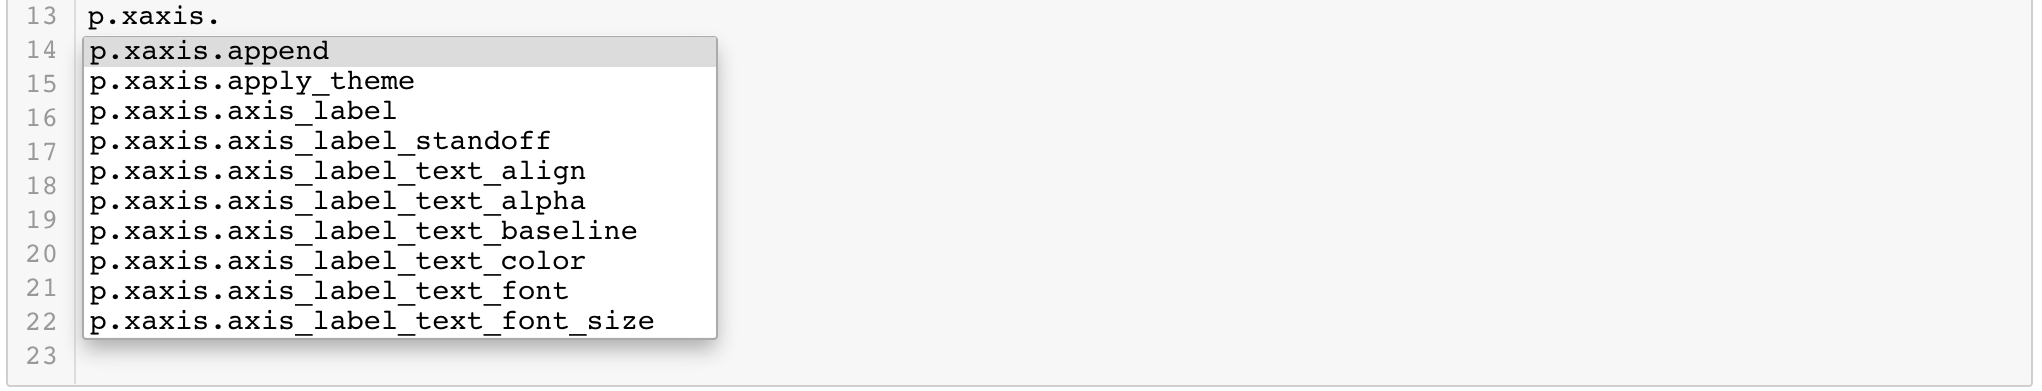

### Achseneigenschaften

Achsenobjekte verfügen über viele konfigurierbare Eigenschaften, mit denen die meisten visuellen Aspekte einer Achse gesteuert werden können. Diese können nach Funktion mit Präfix gruppiert werden:

[Line Properties](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#line-properties), z.B.
* `axis_line_width`
* `major_tick_line_dash`, `major_tick_in and major_tick_out`
* `minor_tick_line_width`, `minor_tick_in and minor_tick_out`

[Text Properties](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#text-properties), z.B.
* `axis_label`, `axis_label_text_color`, `axis_label_standoff`
* `major_label`, `major_label_text_font_size`, `major_label_orientation`

Als einfachen ersten Fall ändern wir die Ausrichtung der wichtigsten Hilfsstrichbeschriftungen auf beiden Achsen einer Zeichnung:

In [7]:
from math import pi

p = figure(plot_width=400, plot_height=400)
p.x([1,2,3,4,5], [2,5,8,2,7], size=10, line_width=2)

p.xaxis.major_label_orientation = pi/4
p.yaxis.major_label_orientation = "vertical"

show(p)

Das nächste Beispiel zeigt Anpassungen an mehreren der verschiedenen Achseneigenschaften gleichzeitig:

In [8]:
p = figure(plot_width=400, plot_height=400)
p.asterisk([1,2,3,4,5], [2,5,8,2,7], size=12, color="olive")

# change just some things about the x-axes
p.xaxis.axis_label = "Temp"
p.xaxis.axis_line_width = 3
p.xaxis.axis_line_color = "red"

# change just some things about the y-axes
p.yaxis.axis_label = "Pressure"
p.yaxis.major_label_text_color = "orange"
p.yaxis.major_label_orientation = "vertical"

# change things on all axes
p.axis.minor_tick_in = -3
p.axis.minor_tick_out = 6

show(p)

## Markierungen konfigurieren

Alle Bokeh-Achsen verfügen über eine Formatierungseigenschaft, deren Wert ein `TickFormatter`-Objekt ist, mit dem Bokeh die von dieser Achse angezeigten Hilfsstriche formatiert. Bokeh konfiguriert standardmäßige Markierungen für numerische, Datums- oder kategoriale Achsen. Häufig möchten wir jedoch das Erscheinungsbild von Markierungsetiketten anpassen. Dies kann durch Ändern der Eigenschaften des von Bokeh ausgewählten Standardformatierers oder durch das vollständige Ersetzen des Formatierers durch einen neuen Typ erreicht werden.

Zunächst ändern wir nun die Eigenschaften eines Standardformatierers ändern. Das standardmäßige Datumsformat ist so konfiguriert, dass Monat/Tag angezeigt wird, wenn sich die Achse auf der Skala von Tagen befindet. Wenn Sie möchten, dass auch immer das Jahr angezeigt wird, können Sie die Days-Eigenschaft in ein Format ändern, das das Jahr enthält (siehe unten).

In [9]:
from math import pi
from bokeh.sampledata.glucose import data

week = data.loc['2010-10-01':'2010-10-08']

p = figure(x_axis_type="datetime", title="Glocose Range", plot_height=350, plot_width=800)
p.xaxis[0].formatter.days = '%d.%m.%Y'
p.xaxis.major_label_orientation = pi/3

p.line(week.index, week.glucose)

show(p)

Weitere Informationen, die aktualisiert werden können, findet ihr im Referenzhandbuch für [DatetimeTickFormatter](http://bokeh.pydata.org/en/latest/docs/reference/models/formatters.html#bokeh.models.formatters.DatetimeTickFormatter).

Zusätzlich zu den Tick-Formatierern, die Bokeh standardmäßig verwendet, gibt es noch andere wie den `NumeralTickFormatter`, der explizit konfiguriert wird. Das folgende Beispiel zeigt, wie ihr einen Formatierer für jede Achse einstellen könnt:

In [10]:
from bokeh.models import NumeralTickFormatter

p = figure(plot_height=300, plot_width=800)
p.circle([1,2,3,4,5], [2,5,8,2,7], size=10)

p.xaxis.formatter = NumeralTickFormatter(format="0.0%")
p.yaxis.formatter = NumeralTickFormatter(format="$0.00")

show(p)

Es gibt viele andere Möglichkeiten zur Kontrolle der Markierungsformatierung, einschließlich der Möglichkeit, ein JavaScript-Snippet für die beliebige Formatierung im Browser bereitzustellen. Weitere Informationen findet ihr in [Tick Label Formats](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#tick-label-formats).

Es ist auch möglich, festzulegen, wo die Markierungen gezeichnet werden. Weitere Informationen findet ihr im Abschnitt [Tick Locations](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#tick-locations) des Benutzerhandbuchs.

## Grids

Es ist auch möglich, die Gestaltung von Rastern zu steuern.

Rastereigenschaften in Bokeh haben zwei mögliche Präfixe:

* `grid`-Eigenschaften (also [line properties](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#line-properties)) steuern die *Gitternetzlinien*
* `band`-Eigenschaften (also [fill properties](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#fill-properties)) steuern die Streifen zwischen den Gitterlinien

Im ersten ersten Beispiel deaktivieren wir die vertikalen Gitterlinien (indem wir die Linienfarbe auf `None`) und das horizontale Gitter hell und gestrichelt setzen.

In [11]:
p = figure(plot_width=400, plot_height=400)
p.circle([1,2,3,4,5], [2,5,8,2,7], size=10)

# change just some things about the x-grid
p.xgrid.grid_line_color = None

# change just some things about the y-grid
p.ygrid.grid_line_alpha = 0.5
p.ygrid.grid_line_dash = [6, 4]

show(p)

Das nächste Beispiel zeigt, wie die `Band`-Eigenschaften eines Diagramms angegeben werden können:

In [12]:
p = figure(plot_width=400, plot_height=400)
p.circle([1,2,3,4,5], [2,5,8,2,7], size=10)

# change just some things about the x-grid
p.xgrid.grid_line_color = None

# change just some things about the y-grid
p.ygrid.band_fill_alpha = 0.05
p.ygrid.band_fill_color = "olive"

show(p)